In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator

# 文件路径
maqin_path = 'MaQin.xlsx'
maduo_path = 'MaDuo.xlsx'

# 读取数据
maqin_df = pd.read_excel(maqin_path)
maduo_df = pd.read_excel(maduo_path)

# 展示基本信息
def basic_info(df, name):
    print(f'\n==== {name} 基本信息 ====')
    print('行数:', df.shape[0], '列数:', df.shape[1])
    print('字段名:', list(df.columns))
    print('数据类型:')
    print(df.dtypes)
    print('缺失值统计:')
    print(df.isnull().sum())
    print('描述性统计:')
    print(df.describe(include='all'))

basic_info(maqin_df, 'MaQin')
basic_info(maduo_df, '玛多')

# 列名自动翻译为中文
translator = Translator()
def translate_columns(df):
    new_cols = []
    for col in df.columns:
        try:
            translated = translator.translate(str(col), dest='zh-cn').text
            new_cols.append(translated)
        except Exception as e:
            new_cols.append(col)
    return new_cols

maqin_df_cn = maqin_df.copy()
maduo_df_cn = maduo_df.copy()
maqin_df_cn.columns = translate_columns(maqin_df)
maduo_df_cn.columns = translate_columns(maduo_df)

print('MaQin 中文列名:', maqin_df_cn.columns.tolist())
print('玛多 中文列名:', maduo_df_cn.columns.tolist())

"""
# 保存带中文列名的新Excel文件
maqin_cn_path = 'MaQin_中文列名.xlsx'
maduo_cn_path = 'MaDuo_中文列名.xlsx'
maqin_df_cn.to_excel(maqin_cn_path, index=False)
maduo_df_cn.to_excel(maduo_cn_path, index=False)
print('已保存带中文列名的新文件：')
print(maqin_cn_path)
print(maduo_cn_path)

# 用中文列名进行可视化分析（数值型字段）
def plot_numeric(df, name):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        plt.figure(figsize=(6,3))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'{name} - {col} 分布')
        plt.xlabel(col)
        plt.show()

plot_numeric(maqin_df_cn, 'MaQin')
plot_numeric(maduo_df_cn, 'Maqin')

# 类别型字段分布（如有）
def plot_categorical(df, name):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        if df[col].nunique() < 20:  # 只画类别数较少的字段
            plt.figure(figsize=(6,3))
            df[col].value_counts().plot(kind='bar')
            plt.title(f'{name} - {col} 分布')
            plt.xlabel(col)
            plt.ylabel('数量')
            plt.show()

plot_categorical(maqin_df_cn, 'MaQin')
plot_categorical(maduo_df_cn, '玛多')
"""


==== MaQin 基本信息 ====
行数: 34 列数: 24
字段名: ['样地编号', '日期', '地点', '经度', '纬度', '海拔', '地形', '坡度', '坡向', '坡位', '草地类型', '植物群落', '凋落物', '立枯', '砾石', '覆沙', '风蚀', '水蚀', '盐碱斑', '裸地面积百分比', '鼠害程度', '利用方式', '利用强度', '备注']
数据类型:
样地编号        object
日期          object
地点          object
经度          object
纬度          object
海拔         float64
地形          object
坡度          object
坡向          object
坡位          object
草地类型        object
植物群落        object
凋落物         object
立枯          object
砾石          object
覆沙          object
风蚀          object
水蚀          object
盐碱斑         object
裸地面积百分比    float64
鼠害程度        object
利用方式        object
利用强度        object
备注          object
dtype: object
缺失值统计:
样地编号        0
日期          0
地点          0
经度          0
纬度          1
海拔          3
地形          0
坡度          4
坡向          6
坡位         10
草地类型        1
植物群落        0
凋落物         3
立枯          1
砾石          1
覆沙          1
风蚀          1
水蚀          1
盐碱斑         1
裸地面积百分比     1
鼠害程度        1
利用方式        2
利用强度

"\n# 保存带中文列名的新Excel文件\nmaqin_cn_path = 'MaQin_中文列名.xlsx'\nmaduo_cn_path = 'MaDuo_中文列名.xlsx'\nmaqin_df_cn.to_excel(maqin_cn_path, index=False)\nmaduo_df_cn.to_excel(maduo_cn_path, index=False)\nprint('已保存带中文列名的新文件：')\nprint(maqin_cn_path)\nprint(maduo_cn_path)\n\n# 用中文列名进行可视化分析（数值型字段）\ndef plot_numeric(df, name):\n    numeric_cols = df.select_dtypes(include='number').columns\n    for col in numeric_cols:\n        plt.figure(figsize=(6,3))\n        sns.histplot(df[col].dropna(), kde=True)\n        plt.title(f'{name} - {col} 分布')\n        plt.xlabel(col)\n        plt.show()\n\nplot_numeric(maqin_df_cn, 'MaQin')\nplot_numeric(maduo_df_cn, 'Maqin')\n\n# 类别型字段分布（如有）\ndef plot_categorical(df, name):\n    cat_cols = df.select_dtypes(include='object').columns\n    for col in cat_cols:\n        if df[col].nunique() < 20:  # 只画类别数较少的字段\n            plt.figure(figsize=(6,3))\n            df[col].value_counts().plot(kind='bar')\n            plt.title(f'{name} - {col} 分布')\n            plt.xlabel(co

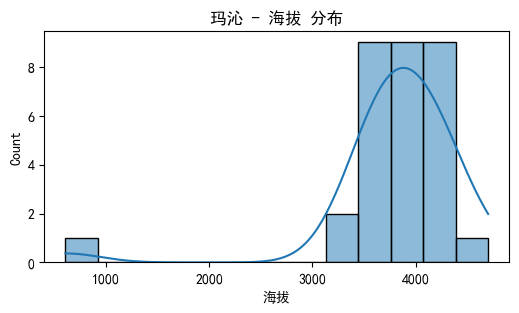

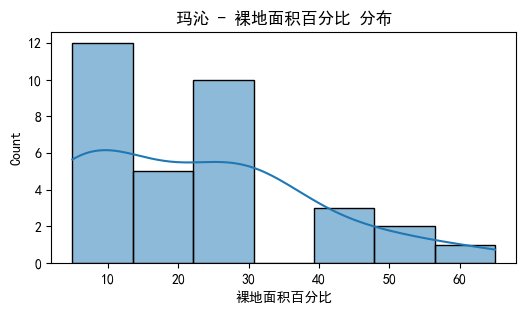

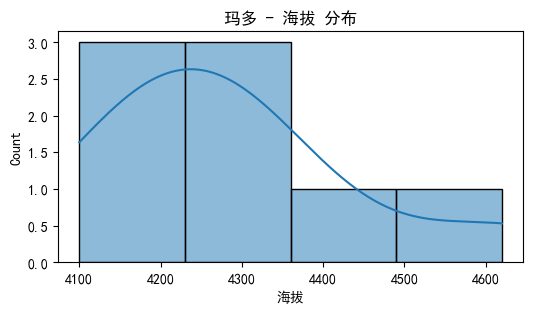

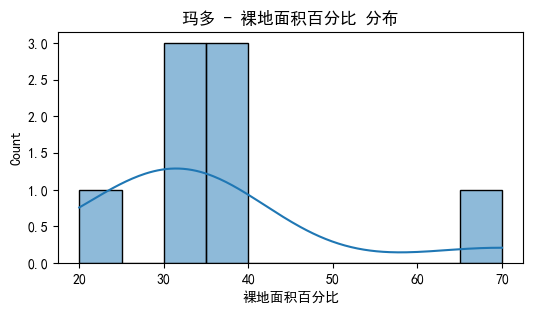

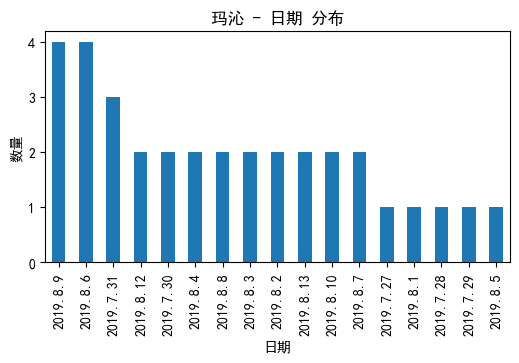

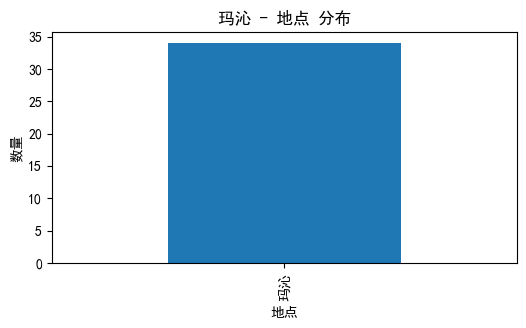

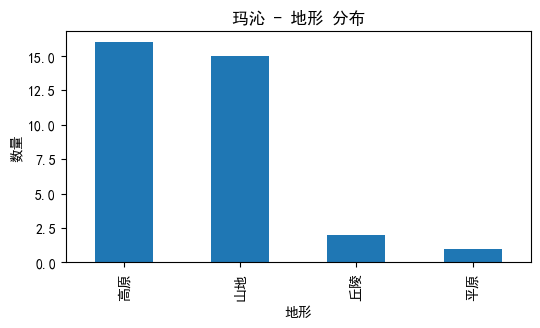

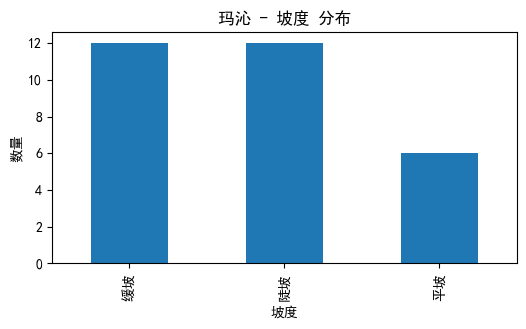

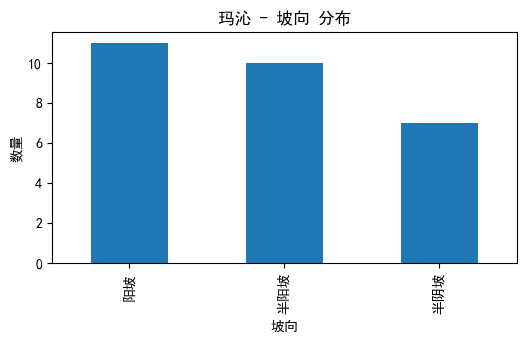

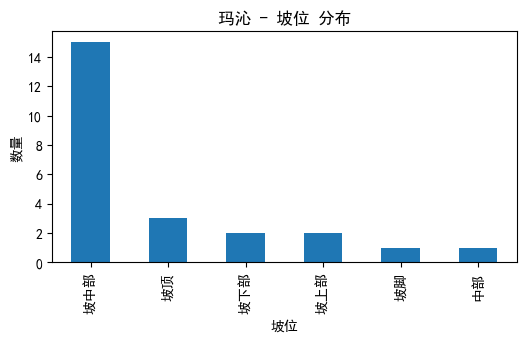

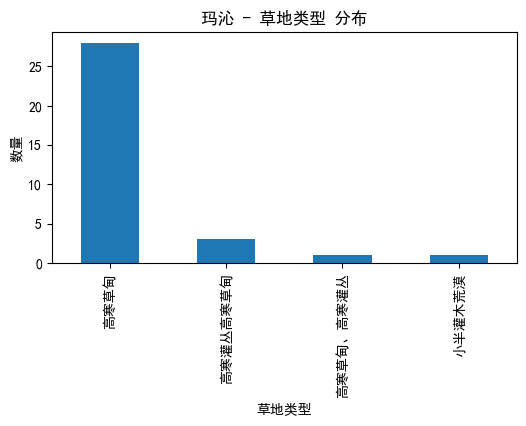

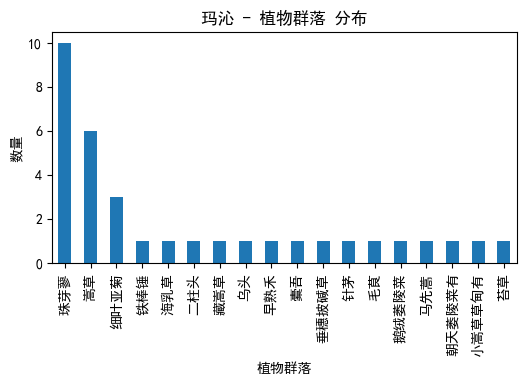

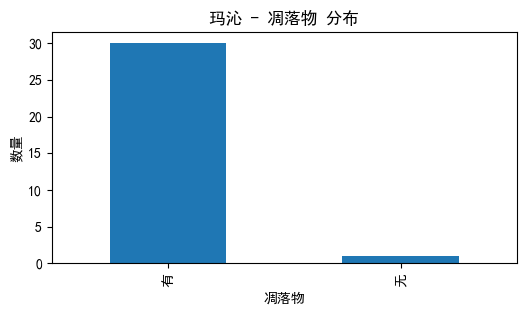

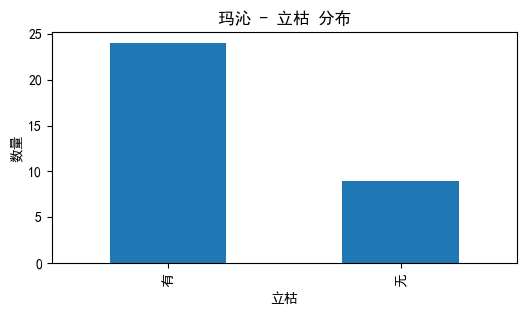

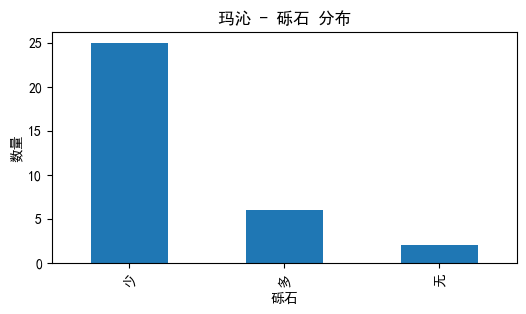

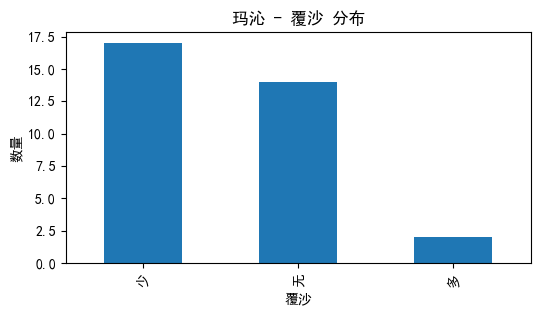

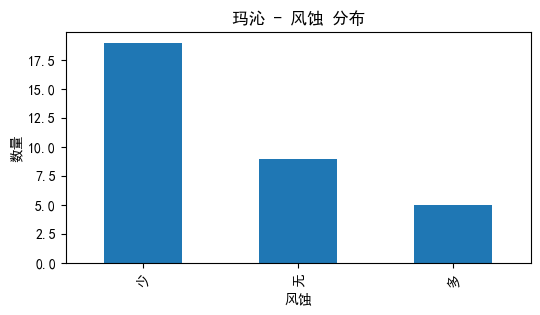

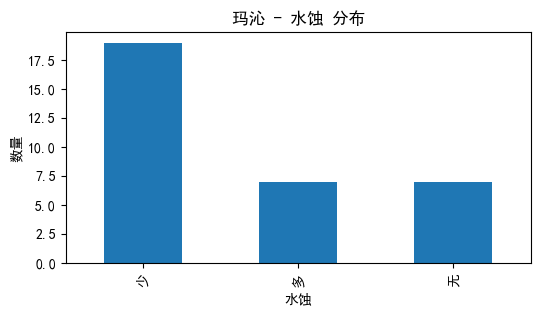

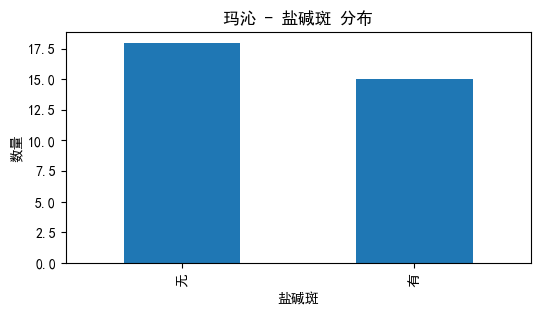

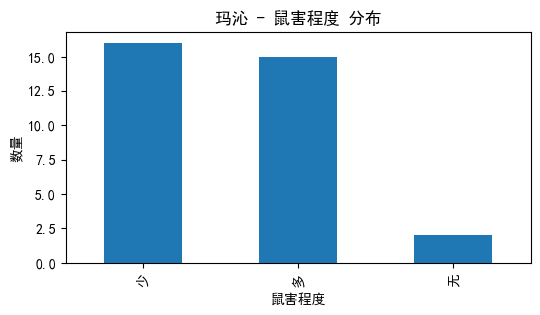

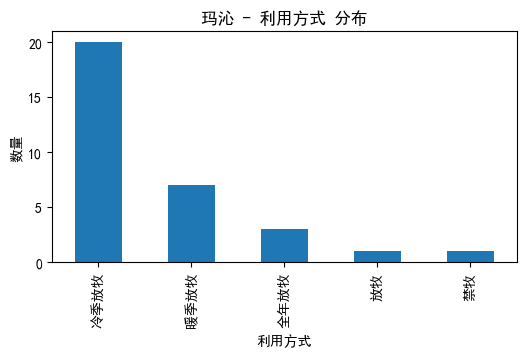

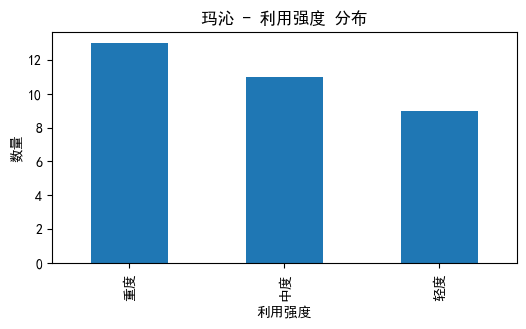

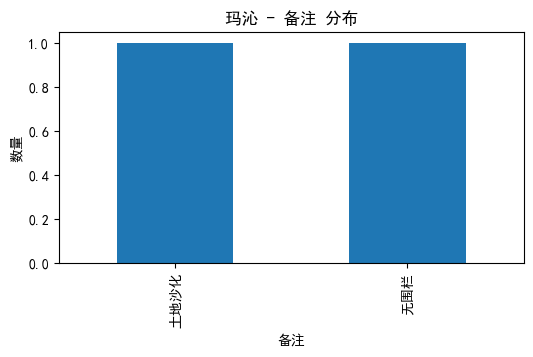

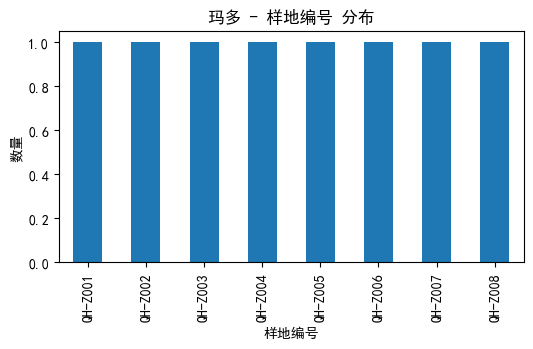

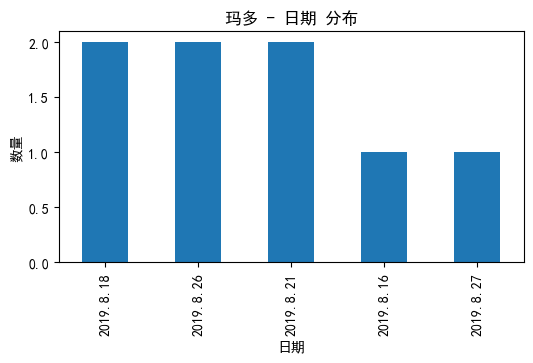

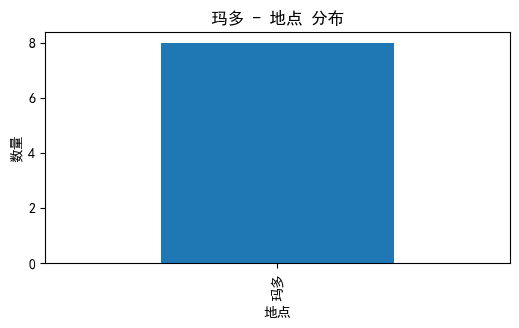

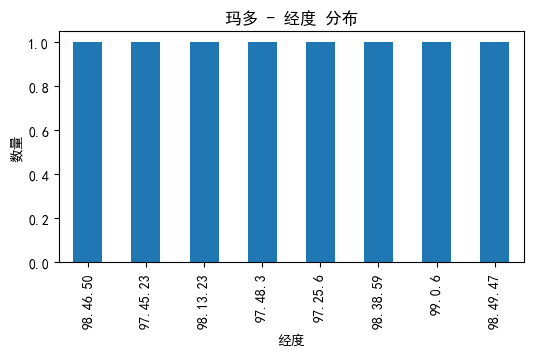

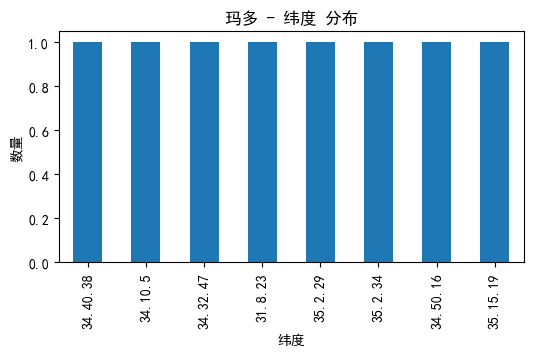

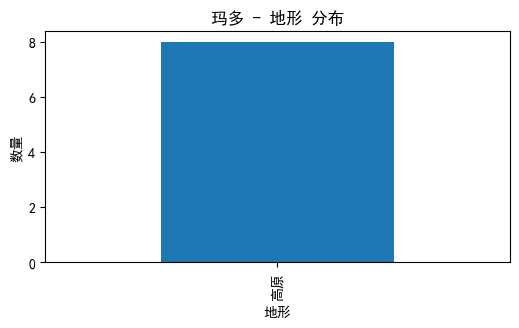

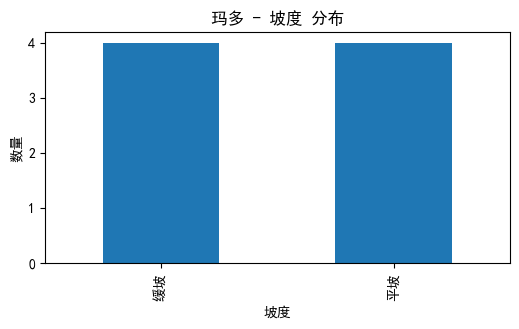

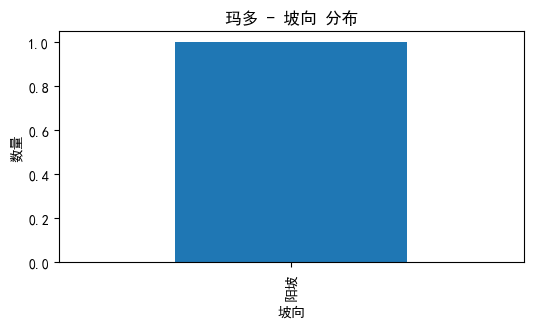

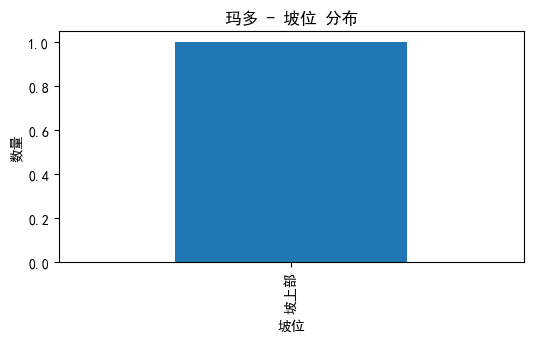

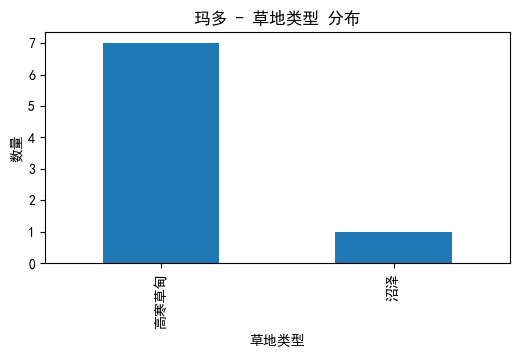

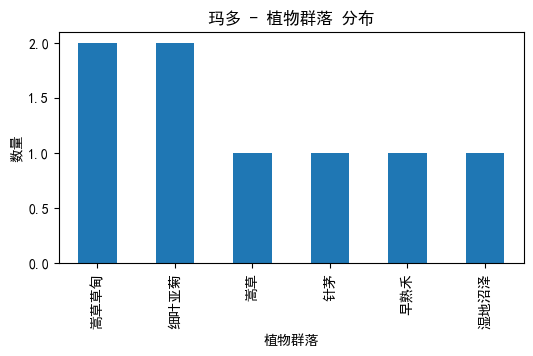

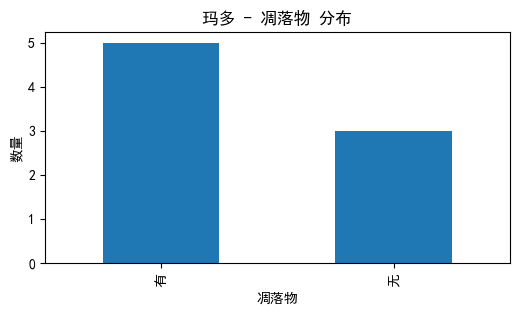

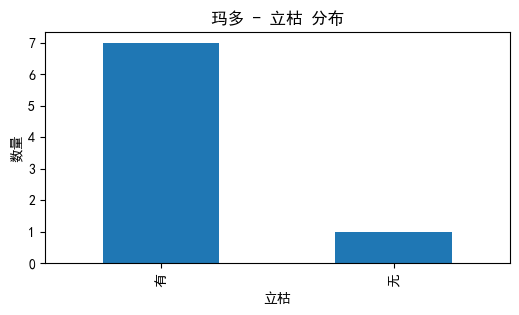

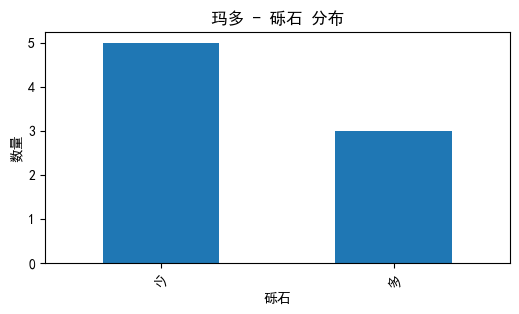

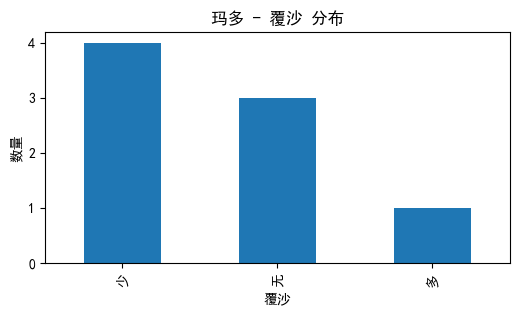

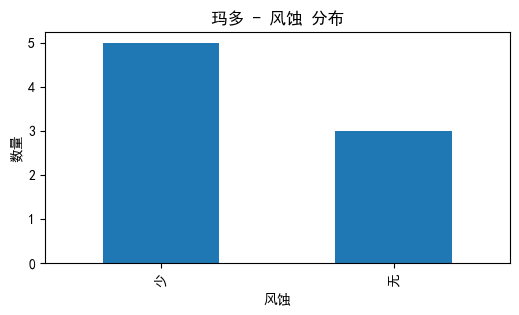

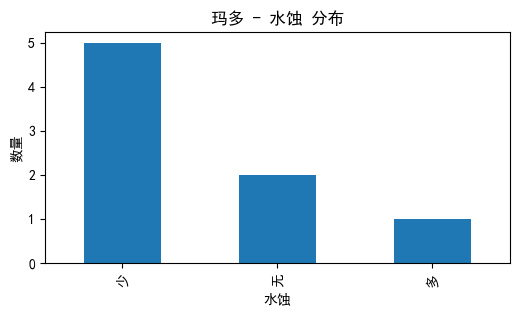

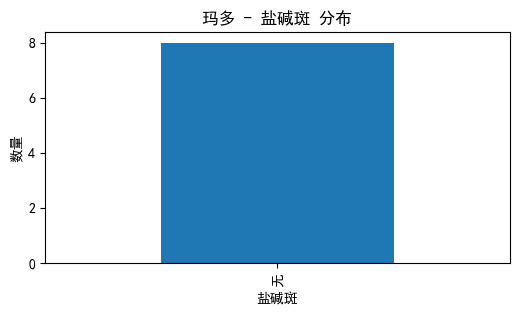

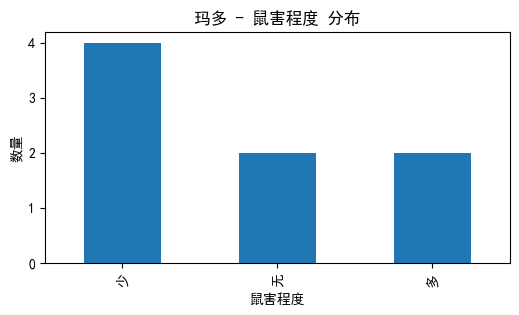

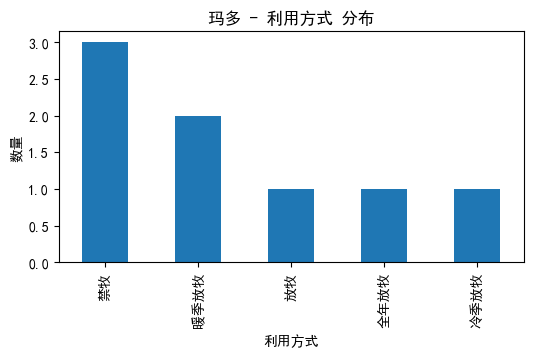

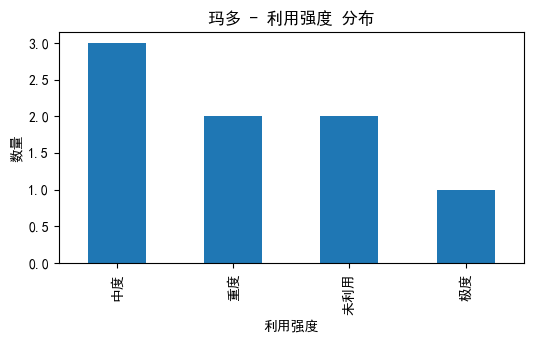

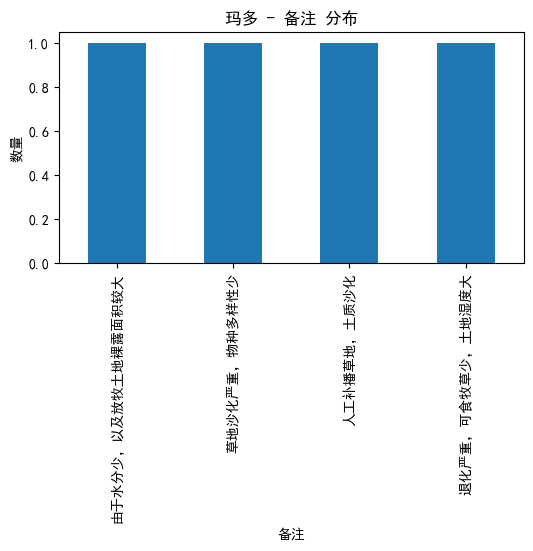

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置为黑体或你系统支持的中文字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示为方块的问题

# 用中文列名进行可视化分析（数值型字段）
def plot_numeric(df, name):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        plt.figure(figsize=(6,3))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'{name} - {col} 分布')
        plt.xlabel(col)
        plt.show()

plot_numeric(maqin_df_cn, '玛沁')
plot_numeric(maduo_df_cn, '玛多')

# 类别型字段分布（如有）
def plot_categorical(df, name):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        if df[col].nunique() < 20:  # 只画类别数较少的字段
            plt.figure(figsize=(6,3))
            df[col].value_counts().plot(kind='bar')
            plt.title(f'{name} - {col} 分布')
            plt.xlabel(col)
            plt.ylabel('数量')
            plt.show()

plot_categorical(maqin_df_cn, '玛沁')
plot_categorical(maduo_df_cn, '玛多')

In [7]:
import pandas as pd

# 文件路径
maqin_path = 'MaQin.xlsx'
maduo_path = 'MaDuo.xlsx'

def analyze_sheet(df, sheet_name, file_name):
    print(f"\n==== {file_name} - {sheet_name} 基本信息 ====")
    print('行数:', df.shape[0], '列数:', df.shape[1])
    print('字段名:', list(df.columns))
    print('数据类型:')
    print(df.dtypes)
    print('缺失值统计:')
    print(df.isnull().sum())
    print('描述性统计:')
    print(df.describe(include='all'))

def analyze_excel(file_path, file_name):
    # 读取所有工作表
    xls = pd.ExcelFile(file_path)
    print(f"\n文件 {file_name} 包含工作表：{xls.sheet_names}")
    for sheet in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet)
        analyze_sheet(df, sheet, file_name)
        # 针对“调查表”和“土壤理化表”可单独分析
        if '调查' in sheet or '理化' in sheet:
            print(f"\n--- 针对 {sheet} 的详细分析 ---")
            # 你可以在这里添加更详细的分析或可视化代码

# 分析 MaQin
analyze_excel(maqin_path, '玛沁')
# 分析 MaDuo
analyze_excel(maduo_path, '玛多')


文件 玛沁 包含工作表：['样地信息', '调查表', '土壤理化']

==== 玛沁 - 样地信息 基本信息 ====
行数: 34 列数: 24
字段名: ['样地编号', '日期', '地点', '经度', '纬度', '海拔', '地形', '坡度', '坡向', '坡位', '草地类型', '植物群落', '凋落物', '立枯', '砾石', '覆沙', '风蚀', '水蚀', '盐碱斑', '裸地面积百分比', '鼠害程度', '利用方式', '利用强度', '备注']
数据类型:
样地编号        object
日期          object
地点          object
经度          object
纬度          object
海拔         float64
地形          object
坡度          object
坡向          object
坡位          object
草地类型        object
植物群落        object
凋落物         object
立枯          object
砾石          object
覆沙          object
风蚀          object
水蚀          object
盐碱斑         object
裸地面积百分比    float64
鼠害程度        object
利用方式        object
利用强度        object
备注          object
dtype: object
缺失值统计:
样地编号        0
日期          0
地点          0
经度          0
纬度          1
海拔          3
地形          0
坡度          4
坡向          6
坡位         10
草地类型        1
植物群落        0
凋落物         3
立枯          1
砾石          1
覆沙          1
风蚀          1
水蚀          1
盐碱斑         1
裸地面积百

In [9]:
import pandas as pd

# 文件路径
maqin_path = 'MaQin.xlsx'
maduo_path = 'MaDuo.xlsx'
output_path = 'Grassland.xlsx'

# 读取所有工作表
maqin_xls = pd.ExcelFile(maqin_path)
maduo_xls = pd.ExcelFile(maduo_path)

# 获取所有工作表名的并集
all_sheets = set(maqin_xls.sheet_names) | set(maduo_xls.sheet_names)

# 合并并写入新文件
with pd.ExcelWriter(output_path) as writer:
    for sheet in all_sheets:
        # 读取各自的表（如果有）
        df_maqin = pd.read_excel(maqin_xls, sheet_name=sheet) if sheet in maqin_xls.sheet_names else pd.DataFrame()
        df_maduo = pd.read_excel(maduo_xls, sheet_name=sheet) if sheet in maduo_xls.sheet_names else pd.DataFrame()
        # 合并（按行拼接，列名自动对齐，不去重，不改格式）
        merged_df = pd.concat([df_maqin, df_maduo], ignore_index=True, sort=False)
        # 写入新文件
        merged_df.to_excel(writer, sheet_name=sheet, index=False)

print(f"合并完成，结果已保存为：{output_path}")

合并完成，结果已保存为：Grassland.xlsx
